In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time 


# Initialize the non-slippery Frozen Lake environment
environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
environment.reset()
environment.render()

# Initialize Q-table with zeros
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)
qtable = np.zeros((16, 4))

# Alternatively, the gym library can also directly
# give us the number of states and actions using 
# "env.observation_space.n" and "env.action_space.n"
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)


Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [3]:
# 1. Randomly choose an action using action_space.sample()
action = environment.action_space.sample()

# 2. Implement this action and move the agent in the desired direction
new_state, reward, done, truncated, info = environment.step(action)

# Display the results (reward and map)
environment.render()
print(f'Reward = {reward}')

Reward = 0.0


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.         0.59049    0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.07973437 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.6561     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.36703125 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.729      0.        ]
 [0.         0.81       0.         0.        ]
 [0.         0.75234375 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.9        0.        ]
 [0.         0.         1.         0.        ]
 [0.

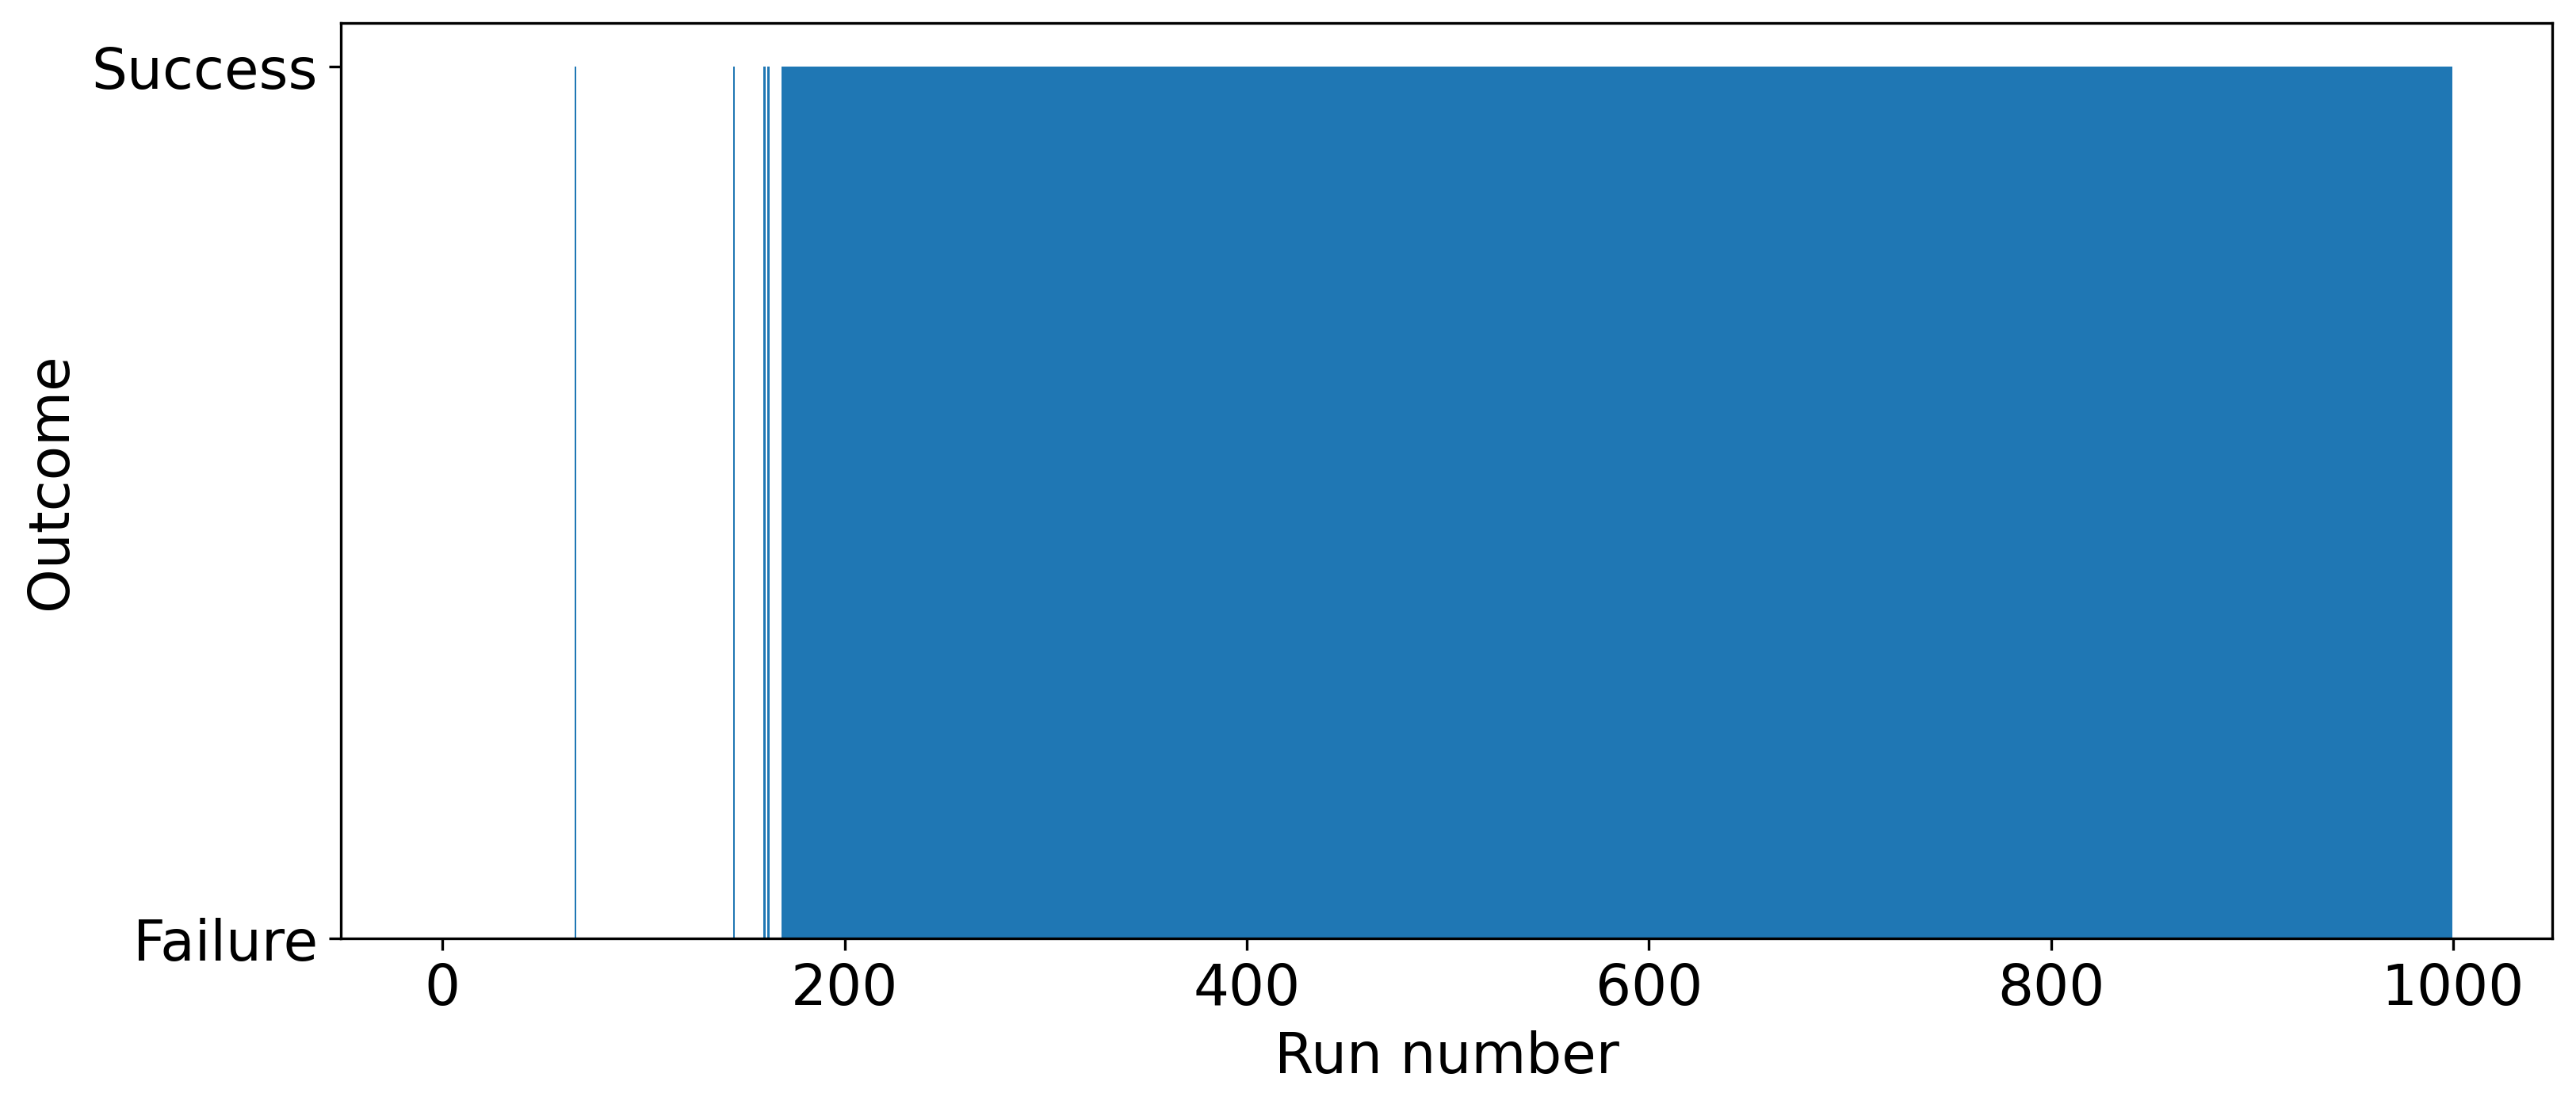

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    state = int(state[0])
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()        
    
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)


        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - 
                                qtable[state, action])
             
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [5]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(episodes):
    state = environment.reset()
    state = int(state[0])
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
          
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)
       
        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [6]:
state = environment.reset()
state = int(state[0])
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()
      
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, truncated, info = environment.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

Sequence = [1, 1, 2, 1, 2, 2]


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.53143933 0.         0.6561     0.59048966]
 [0.59048798 0.729      0.59037812 0.65609978]
 [0.65608833 0.         0.50043901 0.53419925]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.65607688]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80968849 0.9        0.72897477]
 [0.81       0.9        1.         0.81      ]
 [0.

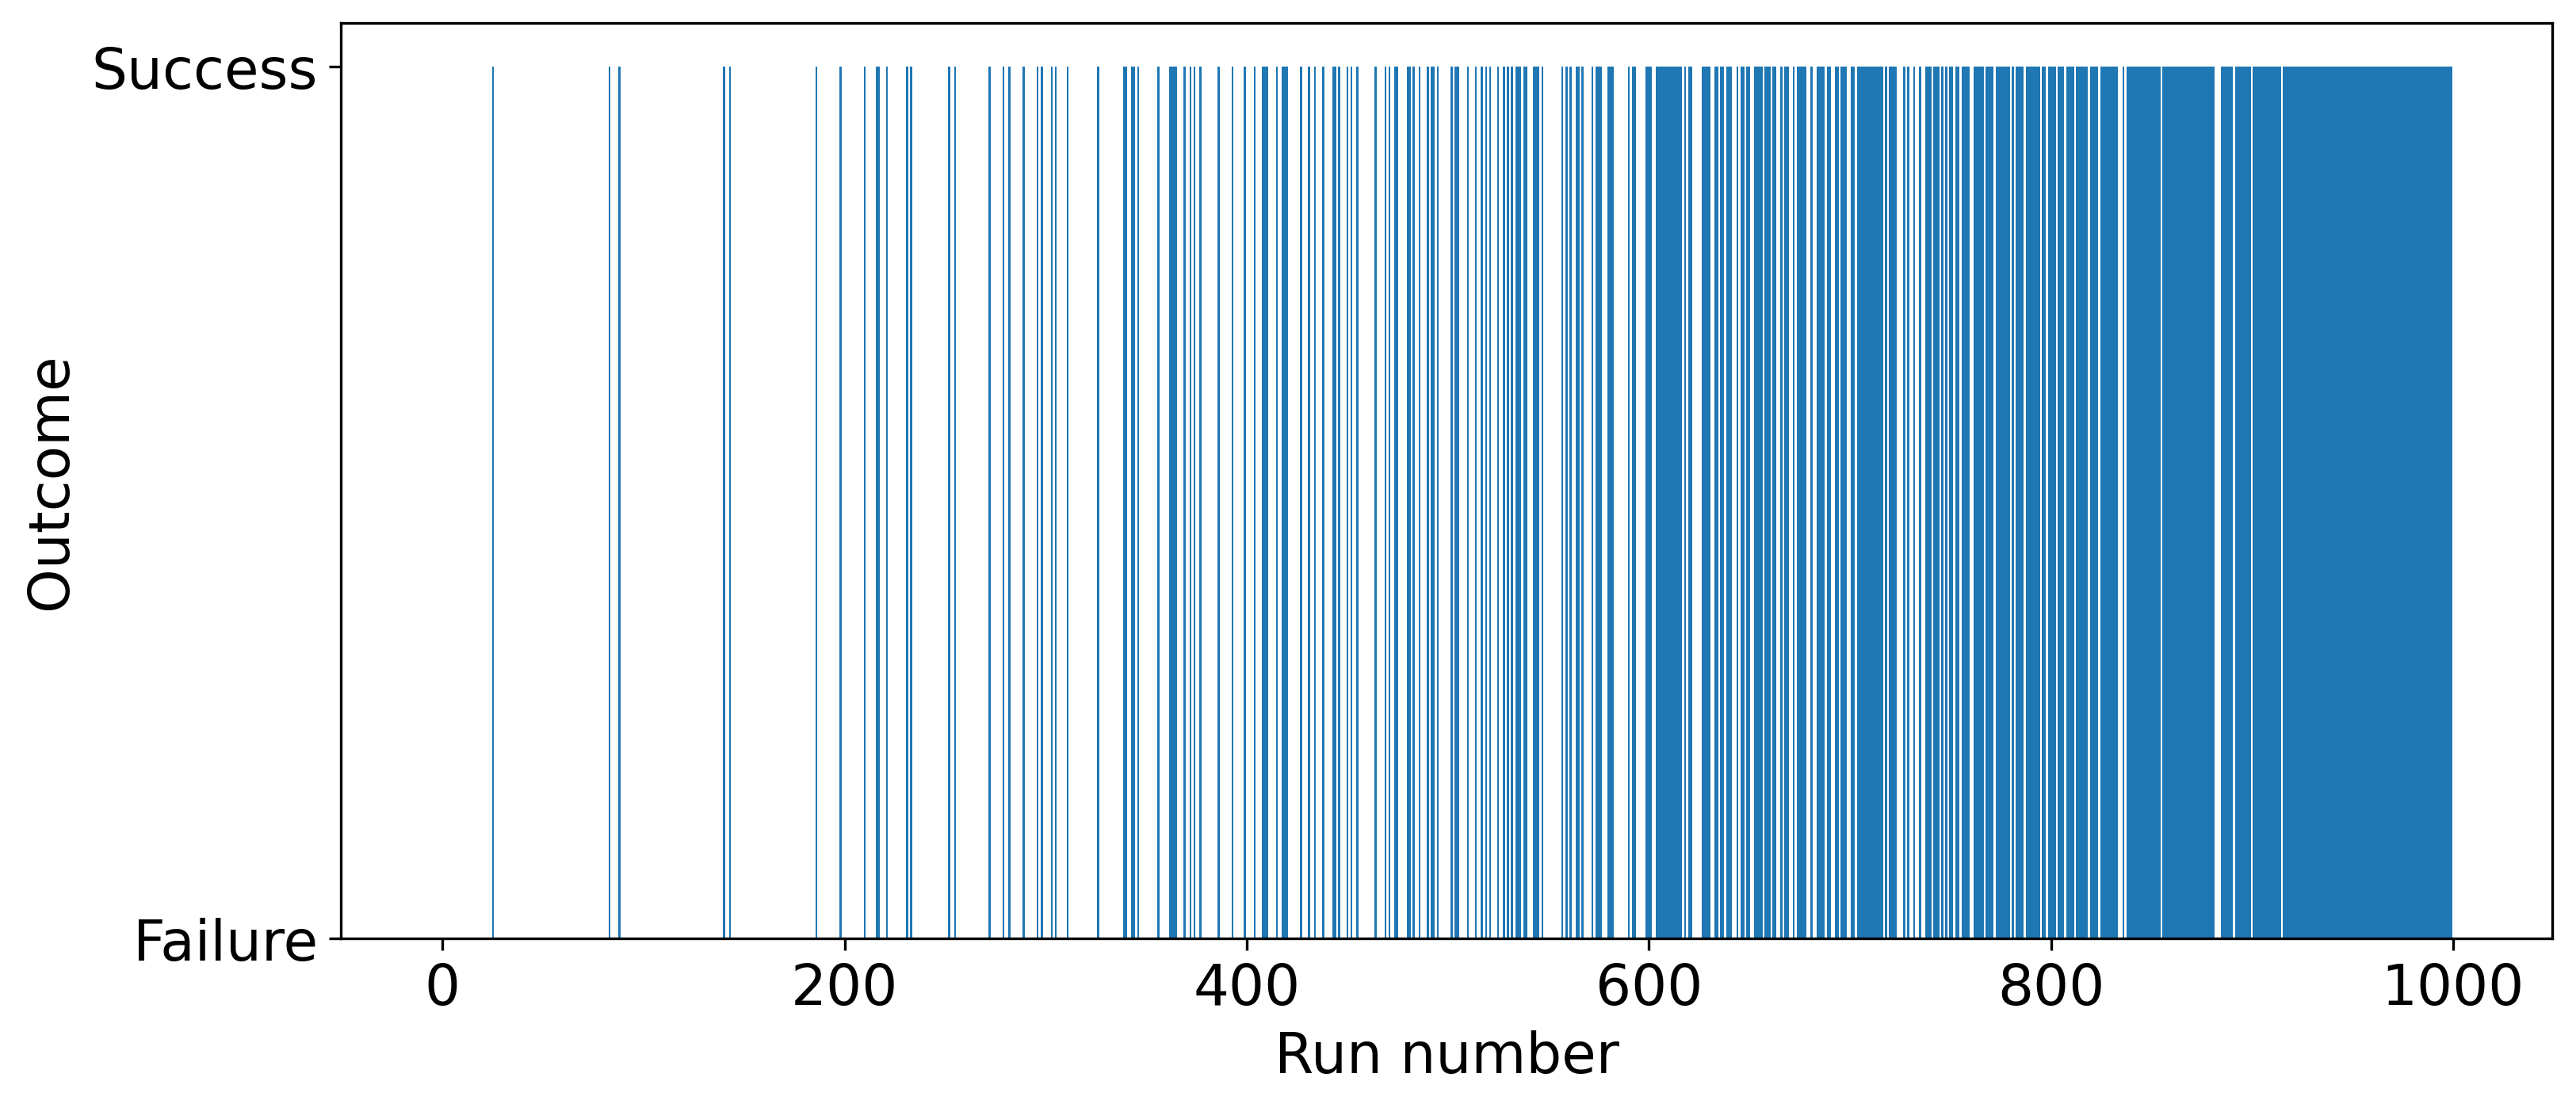

In [7]:
# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episode
salpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    state = int(state[0])
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()
        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])
        
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [8]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()
    state = int(state[0])
    done = False
   
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)
    

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [14]:
# Initialize the slippery Frozen Lake
environment = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")
environment.reset()

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)


def training(environment, qtable ,episodes, alpha, gamma, epsilon, epsilon_decay):
  # Training
  for _ in range(episodes):
      state = environment.reset()
      state = int(state[0])
      done = False

      # By default, we consider our outcome to be a failure
      outcomes.append("Failure")
      
      # Until the agent gets stuck in a hole or reaches the goal, keep training it
      while not done:
          # Generate a random number between 0 and 1
          rnd = np.random.random()

          # If random number < epsilon, take a random action
          if rnd < epsilon:
            action = environment.action_space.sample()

          # Else, take the action with the highest value in the current state
          else:
            action = np.argmax(qtable[state])
        
          # Implement this action and move the agent in the desired direction
          new_state, reward, done, truncated, info = environment.step(action)

          # Update Q(s,a)
          qtable[state, action] = qtable[state, action] + \
                                  alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        
          # Update our current state
          state = new_state

          # If we have a reward, it means that our outcome is a success
          if reward:
            outcomes[-1] = "Success"

      # Update epsilon
      epsilon = max(epsilon - epsilon_decay, 0)

  print()
  print('===========================================')
  print('Q-table after training:')
  print(qtable)

  # Plot outcomes
  plt.figure(figsize=(12, 5))
  plt.xlabel("Run number")
  plt.ylabel("Outcome")
  ax = plt.gca()
  plt.bar(range(len(outcomes)), outcomes, width=1.0)
  plt.show()

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]



Q-table after training:
[[4.03677694e-02 2.78912137e-02 5.23057243e-02 2.89973621e-02]
 [2.29618790e-02 7.85598992e-03 1.23599078e-02 5.72263593e-02]
 [1.59799842e-02 5.06552491e-02 1.99649743e-02 1.86208148e-02]
 [1.00600620e-02 6.91942532e-03 3.50646095e-03 7.82209581e-02]
 [6.04936835e-02 3.02576549e-02 9.51264795e-03 2.40848084e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.34429775e-03 3.89381817e-03 2.09222354e-02 3.55933351e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.25983862e-02 4.21848741e-02 3.91942094e-02 9.38973001e-02]
 [8.97963528e-02 2.51920363e-01 1.16954263e-01 7.76867433e-02]
 [3.81303207e-01 5.16615288e-02 4.44710668e-02 3.84887692e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.75191332e-01 1.22951260e-01 3.34890778e-01 3.82334808e-02]
 [4.67698471e-01 5.27631733e-01 9.06134203e-01 5.16522120e-01]
 [0.00000000e+00 0.00000000e+0

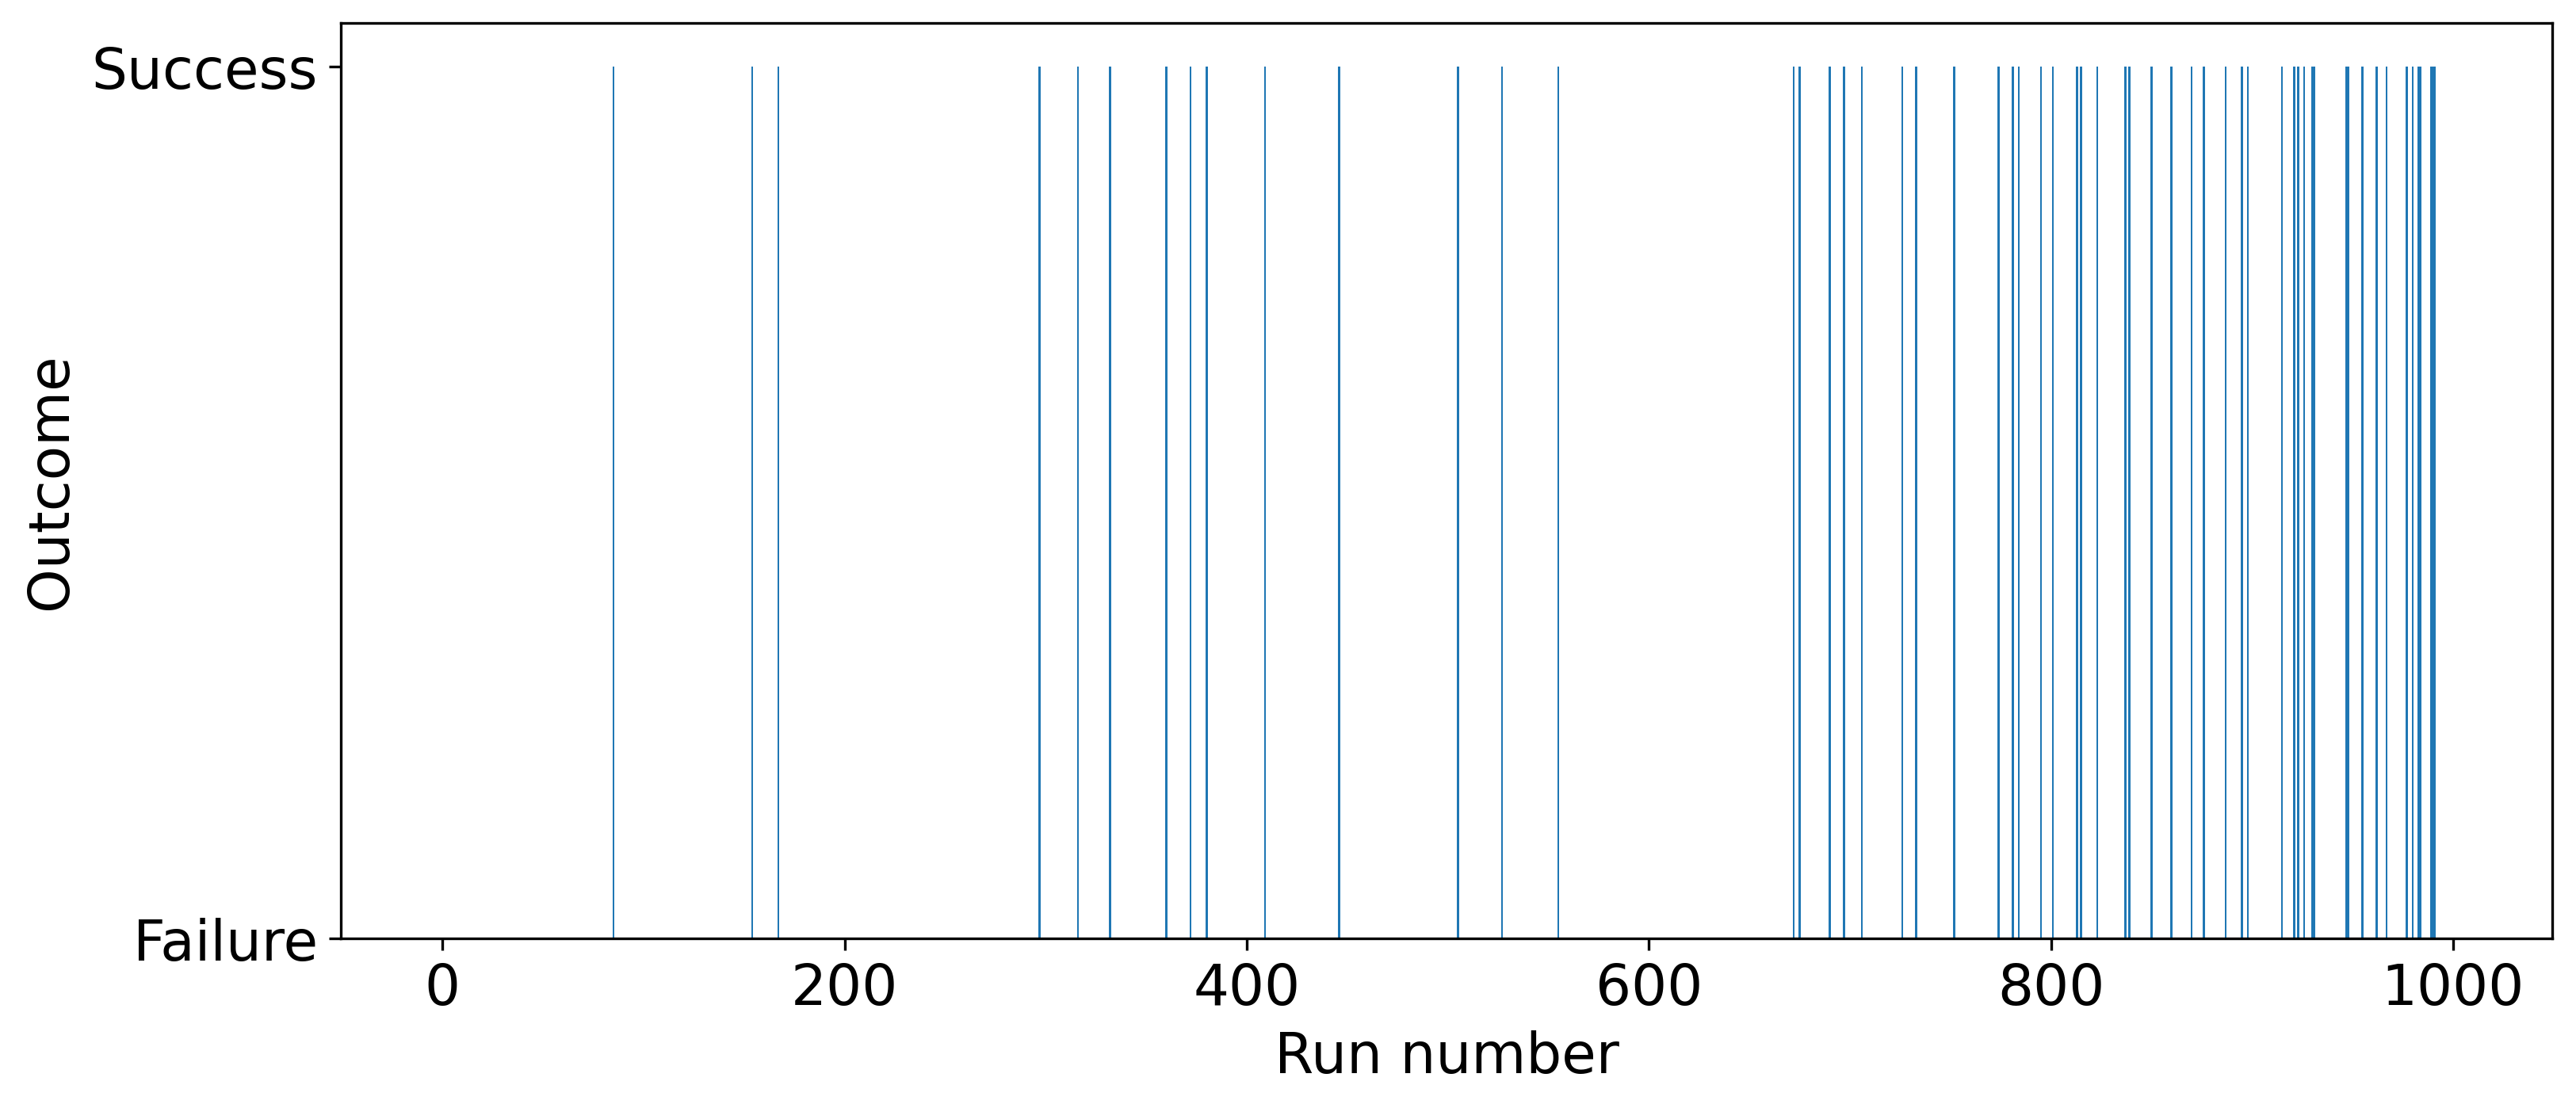

In [15]:
training(environment, qtable, episodes, alpha, gamma, epsilon, epsilon_decay)

In [16]:
def get_success_rate(environment, qtable, episodes):
  nb_success = 0

  # Evaluation
  for _ in range(episodes):
      state = environment.reset()
      state = int(state[0])
      done = False
      
      # Until the agent gets stuck or reaches the goal, keep training it
      while not done:
          # Choose the action with the highest value in the current state
          action = np.argmax(qtable[state])

          # Implement this action and move the agent in the desired direction
          new_state, reward, done, truncated, info = environment.step(action)

          # Update our current state
          state = new_state

          # When we get a reward, it means we solved the game
          nb_success += reward

  # Let's check our success rate!
  return f"Success rate = {nb_success/episodes*100}%"

In [19]:
print(get_success_rate(environment, qtable, episodes))

Success rate = 44.0%


In [ ]:
# Initialize the slippery Frozen Lake
environment = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")
environment.reset()

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 5000        # Incrementamos el numero de episodios
alpha = 0.7            # Ajustamos la tasa de aprendizaje
gamma = 0.95            # Ajustamos el factor de descuento
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.0005  # Hacemos que epsilon decaiga mas lentamente

training(environment, qtable, episodes, alpha, gamma, epsilon, epsilon_decay)
print(get_success_rate(environment, qtable, episodes))